<a href="https://colab.research.google.com/github/Shinigami-Developer/NLP-Natural-Language-Processing-Projects/blob/main/Movies%20Genre%20Classification/Movies_Genre_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Genres Classification**

Predicting the genre of movie from 1000 characters of the script.

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('/content/kaggle_movie_train.csv')

**Exploring the dataset**

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

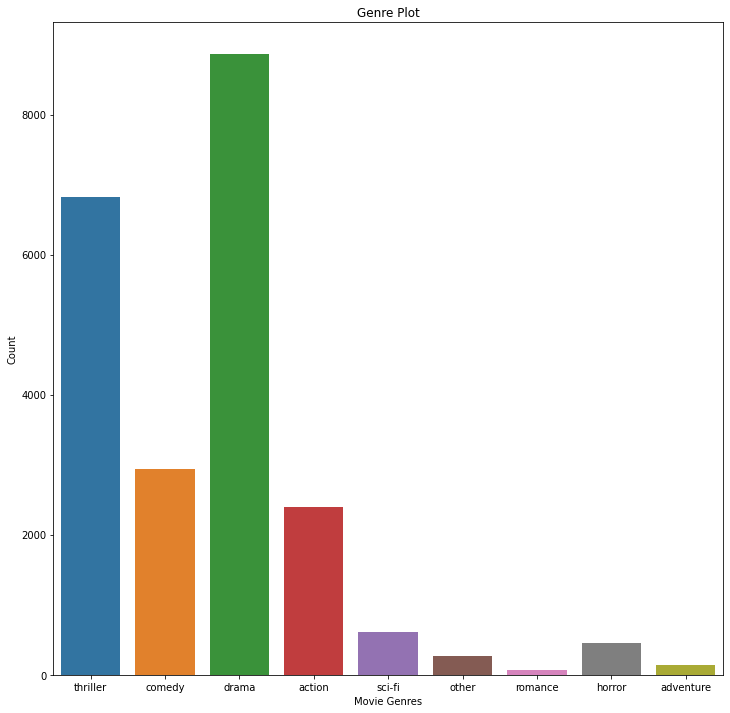

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

**Data Cleaning and Preprocessing**

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text

corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [15]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [17]:
len(corpus)

22579

In [18]:
drama_words = []

for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''

for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

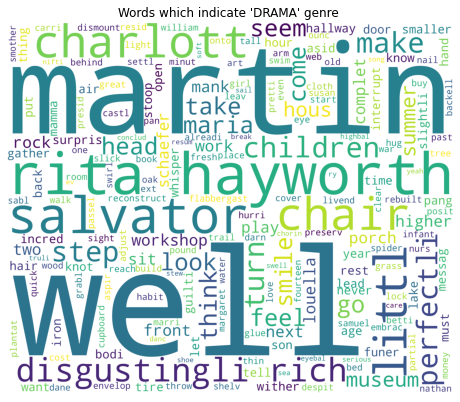

In [19]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

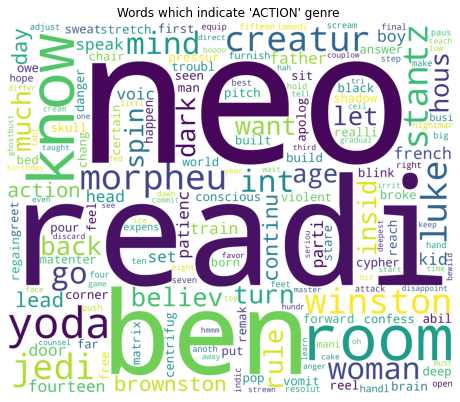

In [20]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

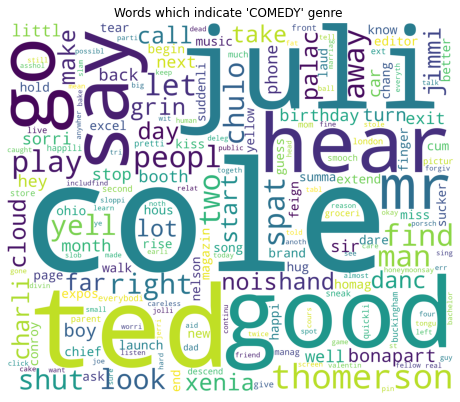

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))

X = cv.fit_transform(corpus).toarray()

In [23]:
y = df['genre'].values

**Model Building**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


**Multinomial Naive Bayes**

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [29]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

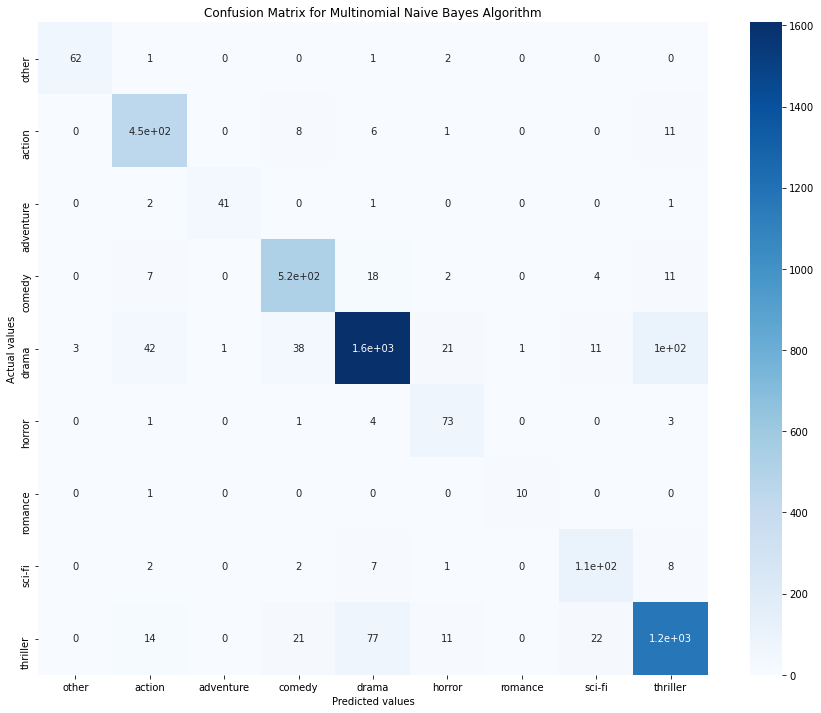

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [31]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [32]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

**Predictions**

In [33]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [34]:
# For generating random integer
from random import randint

In [35]:

# Loading test dataset
test = pd.read_csv('/content/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [36]:
test.shape

(5589, 2)

In [37]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [38]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print()
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: n the meantime that would make that impossible. Starling just keeps staring at Krendler as she gathers her Nagra and purse. Finally, she glances over to her boss and friend, Pearsall, who mouths PEARSALL Sorry, Starling. She lets the marshal lead her from the room. INT. DEPARTMENT STORE DAY Lecter, clutching a shopping bag, stands in the electronics department before a wall of television sets all tuned to the same channel, local news, a talking head with an inset of a photograph of Starling. TALKING HEAD relieved of field duty pending an internal investigation into the charges. Starling, a 7 year veteran on the Bureau began her career with an assignment to interview lethal madman, Hannibal Lecter LECTER Doctor SALES CLERK May I help you, sir? Lecter glances to the young sales clerk, a teenager with a name tag. LECTER I was looking for some good steak knives, Toby, but I'm afraid I got distracted. SALES CLERK Kitchenware, right over there. LECTER Thank you. The clerk walks away.

In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: bending, pulling And he use to be such a sweetie pie! What's wrong with him the last two weeks? VERA casually extends her foot and kicks the toggle bolt that holds the weights in place. LORELEI, leaning forward with suddenly no tension on the ropes, she pulls, falls forward flat on her face. ROSS turns to see what happened. instantly, VERA begins counting VERA Time for you push ups. 1 and 2 and 3 and 4 and 1 and 2 and ... LORELEI, smiling gamely, immediately starts doing push ups. ROSS beaming That's what I like to see. My two best gals pulling together. NEW ANGLE revealing GUS GORMAN sitting in a corner of the room. He is sketching something on the back of an envelope, which he puts back in his pocket as he says GUS He sure wasn't actin' bad and nasty that day in Smallville. Man, he was so full of niceness I was startin' to feel funny about layin' that chunk of... ON ROSS ROSS suddenly KRYPTONITE! GUS Huh? ROSS, with an expression of Eureka! hops off the running treadmill, his

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  perhaps she can fix it without getting too wet. BRENDA grabs her slicker and heads out. The CAMERA FOLLOWS BRENDA through the darkened cabin to the front door. CUT TO EXT. GIRL'S CABIN NIGHT There is a small roof overhang like a porch, affording some protection from the wind and wet. ANOTHER ANGLE, CLOSER as BRENDA hears the tapping sound closer by. She looks and sees. WE SEE WHAT SHE SEES somebody has ties a kitchen knife to a string and left it dangling from the eaves. The wind blows, making the knife tap against the building. BRENDA Neddy? Cut the screwing around, Neddy! She grabs the knife, breaking the string. BRENDA continuing This isn't even half funny. Angry, BRENDA turns and goes back inside the cabin. CUT TO INT. GIRL'S CABIN NIGHT BRENDA comes in shaking off her slicker, carrying the knife. BRENDA Christ, what a jerk. The single bulb goes out. BRENDA continuing Great. Now what? BRENDA crosses to the table, puts down her knife and strikes a match. She fires up the pr

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: sible, he barks. A cow does that ... and gives milk besides. He slams up receiver. DISSOLVE TO 52 CLOSE UP PRINTING PRESSES IN LARGE NEWSPAPER PLANT The papers being pushed out on rack as they are delivered from press. CAMERA PULLS BACK as foreman picks up a copy to examine it for type. INSERT CLOSE UP OF NEWSPAPER showing scare headline describing arrest of George Winton who is held in jail and an autopsy ordered. On front page is a photograph of Winton. CAMERA HOLDS for a moment on photograph, which DISSOLVES TO 53 CLOSE SHOT OF WINTON BEHIND BARS 54 INT. CELL IN THE TOMBS Winton seated on the edge of his cot. CAMERA SWINGS AROUND to reveal the cell door being opened by a guard. Florence enters and goes to boy. He is a rather handsome, but weak, dissipated type, who arouses our sympathy without winning our respect. FLORENCE How do you do. I'm from the Express. Winton looks up. When he speaks, his sentences are halting and broken. He's badly frightened. WINTON Yeah. I suppose 

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: h! My house was blown up, my car was blown up, and my koala bear isn't in too great a shape, either. pausing 'That's too bad.' All you can say is 'That's too bad.' INT. OFFICE The VIEWER'S VIEWPOINT PULLS OUT ON Jazz in the eerily lit office. The Punk Gunslinger stands behind her, pointing a gun. The HEAVY METAL GUNSLINGER sits across from her, doing the same. JAZZ Yes, Ford, that's all I can say. INT. SORORITY HOUSE The GIRLS have formed a giggling circle around Ford. Each sip a silly colored wine cooler. Zuzu is grudgingly having fun, too. FORD So, then Springsteen says to Madonna, 'Hey, I only eat lime Jell O...' Ford gloats as the Girls laugh and applaud. SORORITY SISTER ONE Does Van Halen sleep in the nude? SORORITY SISTER TWO Does Debbie Gibson sleep with Van Halen? SORORITY SISTER THREE Is Sting really an asshole? WEIRD SORORITY SISTER If Axl Rose was reincarnated as a black woman would he be Jodie Whatley or Aretha... MELODI Sisters, sisters, give Ford a break. What do 